<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Lista 2 - NN & Backpropagation



_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__

'2.18.0'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simples possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo percéptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [103]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [123]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)

100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [124]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1306.9207  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1857 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3235 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1520 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8956 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7152 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6092 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4896 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5812 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3710 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4720 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3099 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0940 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1358 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1858 
Epoch 16/300
4/

In [125]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [126]:
print("prediction: "+ str(model.predict(np.array([17])))+"      real value: " + str(f1(17)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
prediction: [[175.01698]]      real value: 175


In [127]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.5951e-05


2.236695036117453e-05

In [130]:
x_val_extrapolado = np.linspace(-10, 20, 100)
y_val_extrapolado = f1(x_val_extrapolado)
model.evaluate(x=x_val_extrapolado,y=y_val_extrapolado)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0467e-04 


0.0001824299688450992

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE).

## Aprendendo uma função não linear

In [81]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2+ x**3)/200

In [82]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

In [98]:
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    #Seu código aqui
    keras.layers.Dense(units=10, activation='tanh'),
    keras.layers.Dense(units=1)

])

model.compile(optimizer="RMSprop", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.0117 
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.3013 
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.0609 
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2608
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4172 
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0240 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.3705 
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.9698 
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7921
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7017 
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6299  
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7346 
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6171 
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6993 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4586 
Epoch 16/4

In [100]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

In [101]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [102]:
model.evaluate(x=x_val,y=y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1982


0.26000267267227173

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbólica




**<font color='red'> Sua resposta aqui </font>** Ao adicionar uma camada oculta com função de ativação não-linear (tanh), a rede aumentou significativamente sua capacidade de aprender a função f2(x) = (x² + x³)/200. Apesar do número de parâmetros aumentar (de 8 para 95), o modelo obteve uma loss final menor e um desempenho melhor na avaliação. A função de ativação tanh, por ser simétrica e permitir valores negativos e positivos, ajudou a rede a capturar a forma da função-alvo com mais precisão. Isso mostra a importância de funções de ativação nas camadas intermediárias para aprender padrões não-lineares.


O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop



**<font color='red'> Sua resposta aqui </font>** Testei diferentes otimizadores para a função f2(x) = (x² + x³)/200.
O SGD apresentou uma loss inicial alta (9.3198) e convergiu para uma loss de avaliação de 0.1798. Embora tenha poucos parâmetros (33), ele convergiu de forma mais lenta e com mais oscilação.
Já o RMSprop, que ajusta o passo de aprendizagem dinamicamente, teve loss final menor (0.1513), indicando que aprendeu a função com mais precisão. O modelo com RMSprop também usou mais parâmetros (64), o que pode ter contribuído para sua capacidade de aprender padrões mais complexos.
No geral, RMSprop se saiu melhor que SGD, especialmente para essa tarefa com função não-linear.



Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?




**<font color='red'> Sua resposta aqui </font>** Neste teste com uma rede de uma camada (perceptron) para aprender a função linear f(x) = 5 + 10x, o otimizador SGD teve desempenho significativamente melhor do que Adam. Enquanto o SGD convergiu rapidamente para um valor de perda próximo de zero e gerou uma predição quase exata, o Adam permaneceu com uma perda muito alta. Isso mostra que, em funções simples e lineares, otimizadores mais sofisticados como o Adam podem não trazer vantagem e até dificultar a convergência. Já o SGD, com seu comportamento direto, é mais adequado para esse tipo de tarefa.



A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

In [131]:
x_val_extrapolado = np.linspace(-10, 20, 100)
y_val_extrapolado = f1(x_val_extrapolado)
model.evaluate(x=x_val_extrapolado,y=y_val_extrapolado)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0467e-04 


0.0001824299688450992


**<font color='red'> Sua resposta aqui </font>**Durante a avaliação do modelo, notei que a performance dentro do intervalo de treino ([0,10]) resultou em um loss de aproximadamente 2.59e-05, enquanto fora do intervalo ([-10, 20]) o loss foi de 2.04e-04.

Isso confirma que o modelo tem pior desempenho na extrapolação, como esperado, mesmo que a diferença de erro não tenha sido muito drástica. Isso provavelmente se deve ao fato de que a função aprendida era linear, o que facilita a generalização fora do intervalo.

O aumento da quantidade de pontos (de 63 para 100) no linspace pode ter ajudado a suavizar a média da função de perda, mas não é a principal razão da diferença observada. O comportamento é coerente com o esperado para uma regressão linear simples.

# Prevendo se vai chover na Austrália

Os próximos exercícios são, em grande parte, uma tradução e adaptação para o português brasileiro do tutorial intitulado [Build Your First Neural Network with Pytorch](https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/)
 entretanto algumas adaptações foram realizadas, tanto no texto, quanto no código, em relação à versão original para utilizar a biblioteca TensorFlow.

Aqui você aprenderá como implementar, treinar e utilizar uma Rede Neural *Feed-Foward* simples para uma tarefa de classificação binária.

Para tal, utilizaremos o pacote [TensorFlow 2.0](www.tensorflow.org) que é, atualmente, uma das principais ferramentas para a implementação de modelos neurais viáveis.

A tarefa que usaremos para fins de exemplo será a de prever se choverá ou não numa cidade australiana amanhã, utilizando dados meteorológicos mensurados na mesma cidade no dia de hoje. A redução dessa tarefa de previsão a uma classificação binária é, evidentemente, uma grande simplificação do problema real de previsão meteorológica, mas como veremos, ainda pode apresentar resultados interessantes, além do caráter didático.



As informações que utilizaremos para treinar nosso modelo para a tarefa de previsão de chuvas estão contidas num conjunto que reúne dados meteorológicos de diversas cidades australianas. Esse conjunto de dados foi curado e disponibilizado através do [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) por [Joe Young](https://www.kaggle.com/jsphyg).



In [4]:
!mkdir data

In [5]:
# Baixando os dados:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output 'data/weatherAUS.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.5M  100 13.5M    0     0  12.8M      0  0:00:01  0:00:01 --:--:-- 12.8M


Os dados estão no formato `.csv` e, com eles em mãos, o primeiro passo é carregá-los em um *data-frame*, usando a função [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do *pandas*.


Com os dados carregados, é possível averiguar que eles são constituídos por 142193 entradas, cada uma contando com 24 variáveis distintas. É possível notar, também, que existem entradas para as quais nem todas as variáveis estão  instanciadas. Além disso, nem todos os valores estão nos formatos que gostaríamos que estivessem para serem processados.

Isso é normal. Dados reais são cheios de falhas e problemas, e exigem trabalho e entendimento para serem utilizados da maneira correta. Por isso, é necessário realizar um **pré-processamento** para adequar os dados, antes de os passarmos para o modelo.

O primeiro passo é escolher quais das variáveis meteorológicas nos interessam. No nosso caso, queremos prever se choverá ou não amanhã, então `RainTomorrow` será nossa variável alvo. Para prevê-la usaremos as variáveis  `Rainfall`, `Humidity3pm`, `Pressure9am` e `RainToday`, que serão nossas *features*.



Em seguida, iniciamos o pré-processamento, propriamente dito.

As variáveis `RainToday` e `RainTomorrow` possuem dois valores possíveis, *Yes* e *No*. Adeque esses valores, convertendo-os para $1$ e $0$, respectivamente.




A seguir, remova todas as entradas que não tenham instanciado os valores de todas as variáveis de interesse com a função [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), pois essas entradas são inúteis para treinar nosso modelo.



Com os dados pré-processados, é possível, agora, plotar as distribuições das variáveis de interesse para poder entender melhor como essas distribuições funcionam. Esse tipo de trabalho é muito importante na implementação real de redes neurais, conhecer os dados é fundamental para tirar o maior proveito do seu modelo e entender verdadeiramente seus resultados.



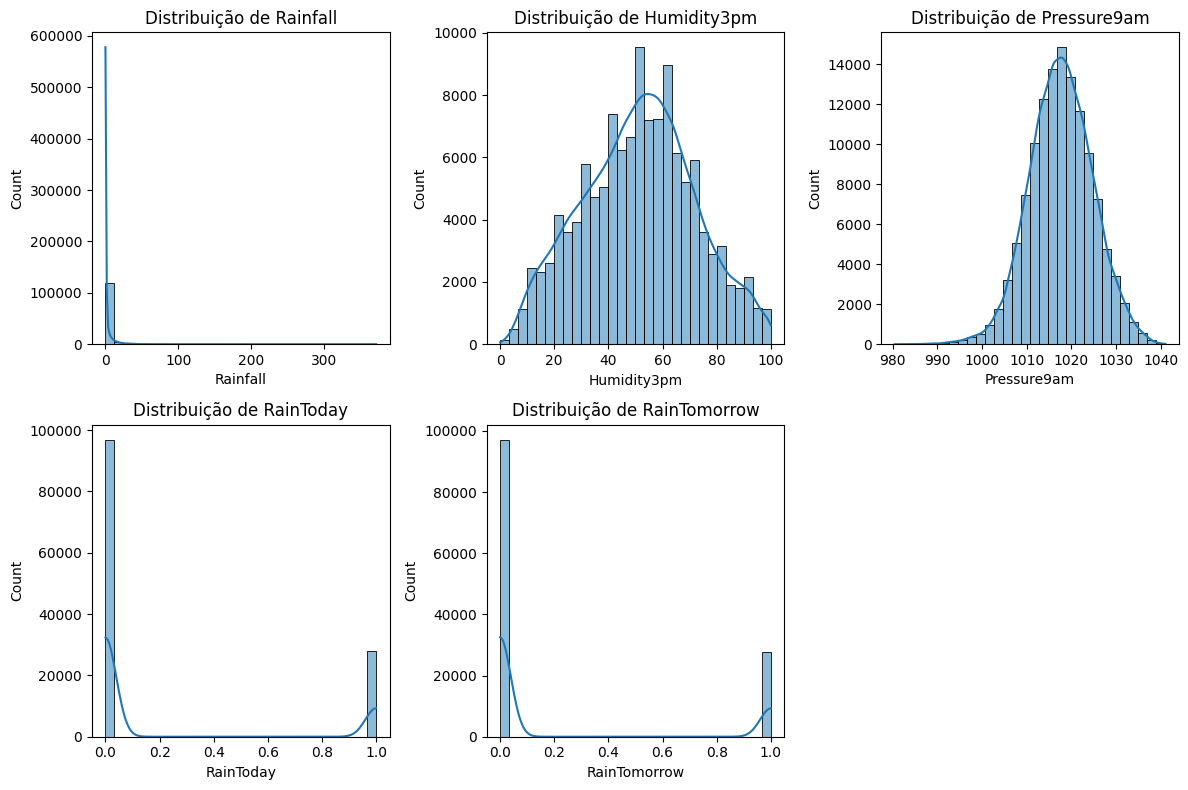

Resumo dos dados após pré-processamento:
            Rainfall    Humidity3pm    Pressure9am      RainToday  \
count  124689.000000  124689.000000  124689.000000  124689.000000   
mean        2.337920      51.222241    1017.673563       0.223035   
std         8.500307      20.667896       7.109522       0.416283   
min         0.000000       0.000000     980.500000       0.000000   
25%         0.000000      36.000000    1013.000000       0.000000   
50%         0.000000      52.000000    1017.700000       0.000000   
75%         0.600000      65.000000    1022.400000       0.000000   
max       371.000000     100.000000    1041.000000       1.000000   

        RainTomorrow  
count  124689.000000  
mean        0.221238  
std         0.415082  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

Total de entradas restantes: 124689


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados a partir de um arquivo CSV
df = pd.read_csv("data/weatherAUS.csv")  # Substitua pelo nome do seu arquivo

# 2. Selecionar as variáveis de interesse
features = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday']
target = 'RainTomorrow'
colunas_interesse = features + [target]
df = df[colunas_interesse]

# 3. Converter valores "Yes" e "No" para 1 e 0 nas colunas RainToday e RainTomorrow
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 4. Remover linhas com valores ausentes nas colunas selecionadas
df = df.dropna()

# 5. Plotar a distribuição das variáveis de interesse
plt.figure(figsize=(12, 8))
for i, col in enumerate(colunas_interesse):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Exibir um resumo do DataFrame final
print("Resumo dos dados após pré-processamento:")
print(df.describe())
print(f"\nTotal de entradas restantes: {len(df)}")



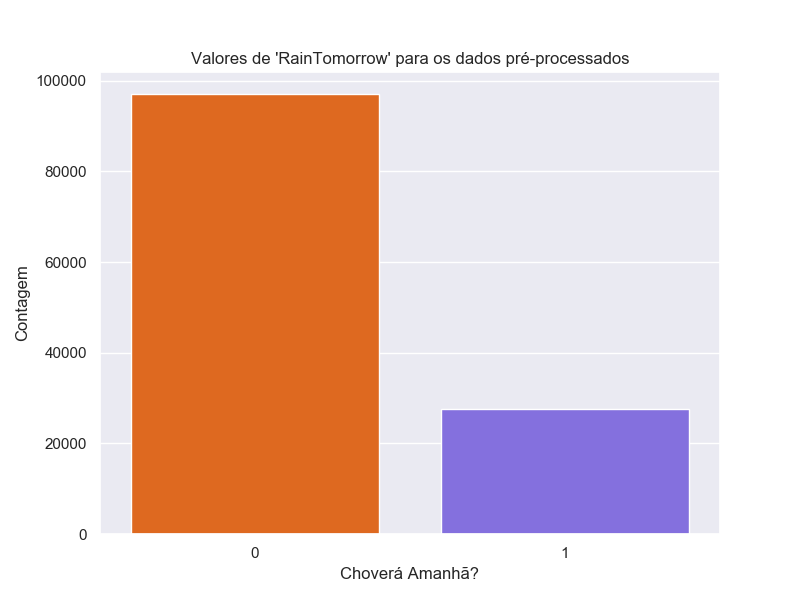



Dentre todas as distribuições das variáveis de interesse, a que mais nos concerne é a da variável alvo, `RainTomorrow`, representada na figura acima.


Essa distribuição nos revela um grande desbalanço entre os dois valores possíveis dessa variável, que constituirão as duas classes do nosso problema de classificação. Esse é um dado importante, pois pode influenciar significativamente a capacidade preditiva do modelo treinado.

Existem maneiras de se lidar com o desbalanceamento dos dados, mas nesse tutorial utilizaremos os dados dessa forma. Isso significa que o *baseline* para a performance do nosso modelo deve ser $78\%$, isso porque, se um modelo chutasse que amanhã não irá chover, todas as vezes, ele obteria uma performance dessa ordem e, como esperamos gerar um modelo mais "inteligente" que isso, esperamos também que a a nossa performance seja superior a essa.

Todo o código referente a esse pré-processamento deve ser escrito pelo próprio aluno seguindo o esqueleto das funções presentes no notebook. Para agilizar a exploração dos dados nós já fornecemos a implementação da função `visualize_data()` que plota visualizações para as distribuições das variáveis de interesse.

In [8]:
def visualize_data(data):
    """Gera graficos das distribuicoes das features"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(x=data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.show()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(x=data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return


In [9]:
def load_data(file_path):
    """Carrega os dados a partir do caminho do arquivo .csv"""
    data = pd.read_csv(file_path)
    return data


In [10]:
def preprocess_data(data):
    """Seleciona variáveis, codifica valores categóricos e remove entradas incompletas"""

    # Seleção das colunas de interesse
    features = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday']
    target = 'RainTomorrow'
    data = data[features + [target]]

    # Mapeamento Yes/No -> 1/0
    data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})
    data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

    # Remoção de entradas com dados faltantes
    data = data.dropna()

    return data


In [11]:
from sklearn.model_selection import train_test_split

def split_data(data):
    """Separa os dados em treino e teste"""

    X = data[['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday']].values
    y = data['RainTomorrow'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test


## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisará escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

<ipython-input-10-09325f7bd6c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})
<ipython-input-10-09325f7bd6c8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})


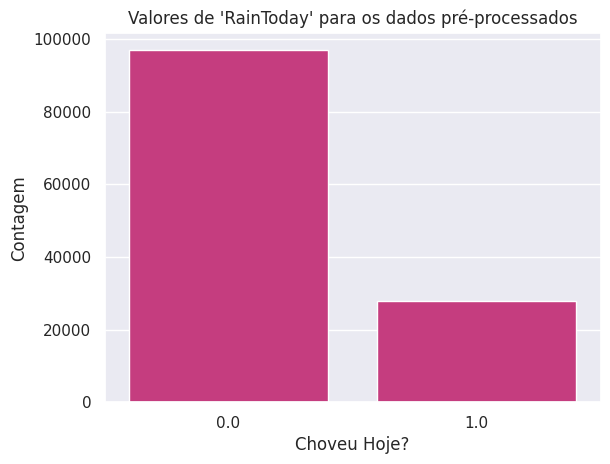

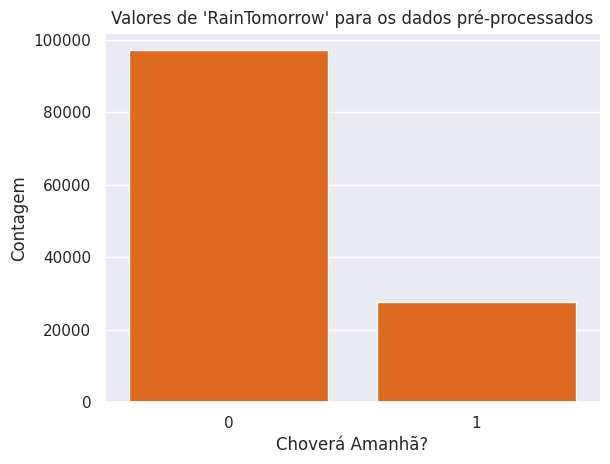

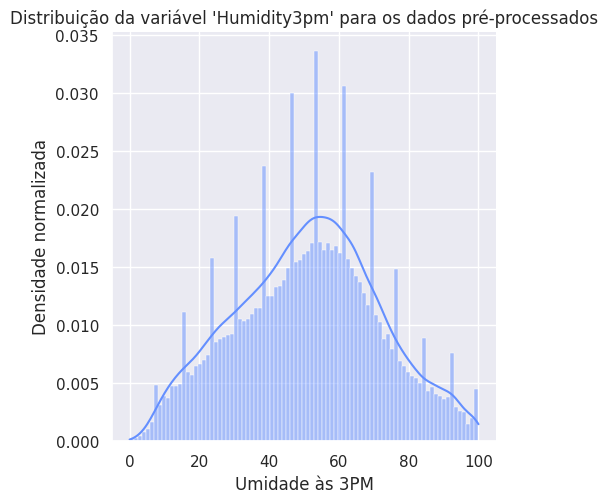

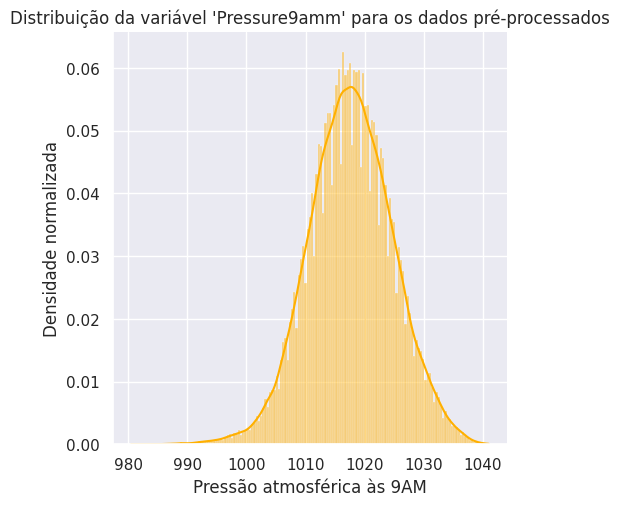

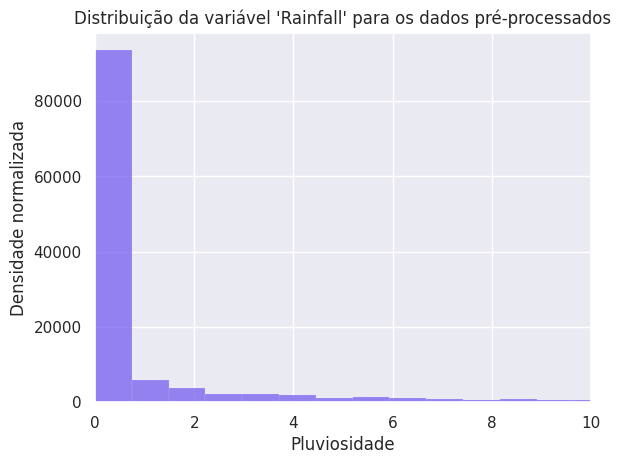

In [12]:
# 1. Carregar
data = load_data("data/weatherAUS.csv")

# 2. Pré-processar
data = preprocess_data(data)

# 3. Visualizar
visualize_data(data)

# 4. Separar
X_train, X_test, y_train, y_test = split_data(data)


# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


In [14]:
model = tf.keras.Sequential([
    keras.Input(shape=(4,)),  # 4 variáveis de entrada: Rainfall, Humidity3pm, Pressure9am, RainToday
    keras.layers.Dense(units=10, activation="relu"),
    keras.layers.Dense(units=8, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid"),  # Saída binária
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7614 - loss: 2.8364
Epoch 2/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8136 - loss: 0.4369
Epoch 3/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8218 - loss: 0.4265
Epoch 4/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8221 - loss: 0.4239
Epoch 5/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8247 - loss: 0.4201
Epoch 6/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8248 - loss: 0.4167
Epoch 7/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8287 - loss: 0.4100
Epoch 8/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8319 - loss: 0.4066
Epoch 9/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8312 - loss: 0.4070
Epoch 10/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8313 - loss: 0.4035
Epoch 11/25
3118/3118 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8304 - loss: 0.4045
Epoch 12/25
3118/3118 ━━━━

In [22]:
def VaiChover(modelo, entrada):
    """
    Recebe um modelo treinado e uma entrada (ou conjunto de entradas)
    Retorna 1 se a previsão for que vai chover, 0 caso contrário
    """
    probabilidade = modelo.predict(entrada)
    return (probabilidade >= 0.5).astype(int)  # threshold padrão de 50%


In [26]:
# Previsão para todo o conjunto de teste
predicoes = VaiChover(model, X_test)
print(predicoes)


780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (744.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 124 (500.00 B)

In [24]:
model.evaluate(x=X_test,y=y_test)

780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8360 - loss: 0.3985


[0.39990532398223877, 0.8373165726661682]